### 1. Activity 7

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import bs4
import codecs
import sqlite3
import sqlalchemy as sqla

### Reading Tabular Data from a Web Page and Creating DataFrames 

In this activity, you have been given a Wikipedia page where you have the GDP of all countries listed. You have been asked to create three DataFrames from the three sources mentioned in the page (https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)):


Open the page in a separate Chrome/Firefox tab and use something like an Inspect Element tool to view the source HTML and understand its structure

Read the page using bs4 

In [39]:
# Opening the web page to view the HTML source and to understand its structure.
web_page = open("Data/List of countries by GDP (nominal) - Wikipedia.htm","r")

# Reading the page using bs4.
soup = BeautifulSoup(web_page)
web_page.close()

Find the table structure you will need to deal with (how many tables there are?) 

In [41]:
# Counting the number of tables.
total_tables = soup.find_all("table")
print('Total tables are:', len(total_tables))

Total tables are: 9


Find the right table using bs4 

In [46]:
# Finding the table needed for the exercise.
data_tbl = soup.find('table', {'class': '"wikitable"|}'})

# Displaying the type of table.
type(data_tbl)

bs4.element.Tag

Separate the source names and their corresponding data 

In [55]:
# Seperating the source names and their data.
web_page_sources = data_tbl.tbody.findAll('tr', recursive=False)[0]

# Getting sources list.
web_page_sources_list = [td for td in web_page_sources.findAll('td')]
print('Total tables are:', len(web_page_sources_list))

# Finding their corresponding data.
data = data_tbl.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

d_tables = []     
for td in data:
    d_tables.append(td.findAll('table'))
print('Total data tables are:',len(d_tables))      

Total tables are: 3
Total data tables are: 3


Get the source names from the list of sources you have created 

In [57]:
# Getting source names by using findAll function parsed to 'a' and then getText(), itered in a list.
web_src_names = [s.findAll('a')[0].getText() for s in web_page_sources_list]
web_src_names

['International Monetary Fund', 'World Bank', 'United Nations']

Separate the header and data from the data that you separated before for the first source only, and then create a DataFrame using that 

In [58]:
# finding the dataframe for the first datasource
# first, will seperate the header with the .strip() command in a for loop extracting 'thead'
# then, finding the rows through the tbody using the findAll() function
# then, finding the data from the rows with the strip() function parsing td
# then using pandas DataFrame() function to convert to a dataframe
header1 = [th.getText().strip() for th in d_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [62]:
rows1 = d_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]
d_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]
df1 = pd.DataFrame(d_rows1, columns=header_1)
df1

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"
...,...,...,...
186,186,Federated States of Micronesia,329
187,187,Palau,321
188,188,Marshall Islands,199
189,189,Kiribati,186


Repeat the last task for the other two data sources

In [63]:
# Repeating the prior process for the other 2 sources with the same logic
header2 = [th.getText().strip() for th in d_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [64]:
rows2 = d_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]
# Will need to add a custom function to strip ♠ out of the data, since I ran it in the same
# logic of prior and I was getting huge numbers and ♠ icon that needs to be removed
def text_strip(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        ind = td.text.find('♠')
        return td.text[ind+1:].strip()
# Altering d_rows_2 to add the text_strip() function created to strip the unwanted data including ♠ icon
d_rows2 = [[text_strip(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
df2 = pd.DataFrame(d_rows2, columns=header2)
df2

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"
...,...,...,...
184,184,Palau,292
185,185,Marshall Islands,199
186,186,Kiribati,196
187,187,Nauru,114


In [66]:
# Last source will be repeated same as the source source since it has the same contents that needed
# to be removed
header3 = [th.getText().strip() for th in d_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [67]:
rows3 = d_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]
d_rows3 = [[text_strip(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows3]
df3 = pd.DataFrame(d_rows3, columns=header3)
df3

,Rank,Country,GDP(US$MM)
0,1,United States,"18,624,475"
1,2,China[n 4],"11,218,281"
2,3,Japan,"4,936,211"
3,4,Germany,"3,477,796"
4,5,United Kingdom,"2,647,898"
...,...,...,...
206,207,Marshall Islands,209
207,208,Nauru,182
208,209,Kiribati,180
209,210,Montserrat,63


### 2. Activity 8

Handling Outliers and Missing Data In this activity, we will identify and get rid of outliers. Here, we have a CSV file. The goal here is to clean the data by using the knowledge that we have learned about so far and come up with a nicely formatted DataFrame. Identify the type of outliers and their effect on the data and clean the messy data. The steps that will help you solve this activity are as follows:


Read the visit_data.csv file. 

Check for duplicates. 

Check if any essential column contains NaN. 

Get rid of the outliers. 

Report the size difference. 

Create a box plot to check for outliers. 

Get rid of any outliers.

In [71]:
# Reading csv file with read_csv() function then showing data with head() function
df4 = pd.read_csv('Data/visit_data.csv')
df4.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [76]:
# Checking for duplicates using any() function to determine if true or false and duplicated() function
# to find the duplicates in a certain variable
print(f'Does First name has duplicates? - {any(df4.first_name.duplicated())}')
print(f'Does Last name has duplicates? - {any(df4.last_name.duplicated())}')
print(f'Does E-mail has duplicates? - {any(df4.email.duplicated())}')

Does First name has duplicates? - True
Does Last name has duplicates? - True
Does E-mail has duplicates? - False


In [78]:
# Checking for NaNs in important columns
# this is done by using any() with isnull function similar to finding duplicates
print(f'Does Email column contain NaN? - {df4.email.isnull().values.any()}')
print(f'Does IP Address column contain NaN? - {df4.ip_address.isnull().values.any()}')
print(f'Does Visit column contain NaN? - {df4.visit.isnull().values.any()}')

Does Email column contain NaN? - False
Does IP Address column contain NaN? - False
Does Visit column contain NaN? - True


In [83]:
# Getting rid of outliters which willl be the NaN's found in visit
# Will use the np.isfinite function in Numpy to remove NaN's from the visit column
# Then will check on the data size before and after
oldsize = df4.shape
df4 = df4[np.isfinite(df4['visit'])]
newsize = df4.shape
#print(f'Size before: {before[0]}\nSize After: {after[0]}')

In [87]:
print("The size of previous data was - {oldsize[0]} rows and the size of the new one is - {newsize[0]} rows". format(oldsize=oldsize, newsize=newsize))


The size of previous data was - 974 rows and the size of the new one is - 974 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x7f80687d75e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f80687d7ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f80687d7280>],
 'medians': [<matplotlib.lines.Line2D at 0x7f80687bf3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f80687bf700>],
 'means': []}

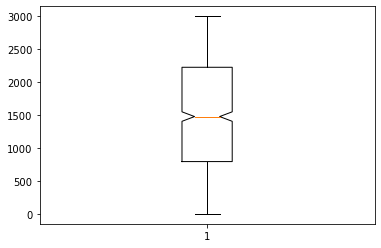

In [88]:
# Creating a boxplot on the visit column to check for the outliers
plt.boxplot(df4.visit, notch=True)

In [91]:
# Will get rid of values after 2900 and lower than 100
df5 = df4[(df4['visit'] <= 2900) & (df4['visit'] >= 100)]
print(f'After removing outliers, the data size is: {df5.shape}')

After removing outliers, the data size is: (923, 7)


### 3. Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):

a. Name, Address, City, State, Zip, Phone Number

b. Add at least 10 rows of data and submit your code with a query generating your results.

In [98]:
# Creating the query.
query = """
CREATE TABLE tbl_contact_info
(Name VARCHAR(40), Address VARCHAR(50), 
City VARCHAR(40), State VARCHAR(2),
Zip INTEGER(5), Phone_Number INTEGER(10)
);"""

In [99]:
# Executing the query using sqlite3.
con = sqlite3.connect('mydata_1.sqlite')
con.execute(query)

# Committing the query.
con.commit()

In [101]:
# Creating the random data to insert into the database.
data = [('Alex G', '111 Red Street', 'Orlando', 'FL', 60000, 1111111111), 
        ('Bob K', '222 Orange Street', 'Chicago', 'IL', 60001, 2222222222), 
        ('Catherine D', '333 Blue Street', 'Detroit', 'MI', 50001, 3333333333), 
        ('Doug E', '444 Black Street', 'Dallas', 'TX', 50002, 4444444444), 
        ('Ester G', '555 Silver Street', 'New York', 'NY', 50010, 5555555555), 
        ('John Doe', '666 Yellow Street', 'Boston', 'MA', 60080, 6666666666),
        ('Murphy F', '777 Brown Street', 'Los Angeles', 'CA', 61090, 7777777777),
        ('Katie P', '888 Gold Street', 'Las Vegas', 'NV', 60200, 8888888888), 
        ('Shawn C', '999 Violet Street', 'Celveland', 'OH', 80080, 9999999999), 
        ('Joey T', '123 Green Street', 'Reston', 'VA', 90010, 1231231231)]

In [102]:
# SQL command to insert data into table.
stmt = "INSERT INTO tbl_contact_info VALUES(?, ?, ?, ?, ?, ?)"

# Inserting data into table.
con.executemany(stmt, data)

In [103]:
# Selecting data from SQL table.
cursor = con.execute('select * from tbl_contact_info')
cursor.fetchall()

[('Alex G', '111 Red Street', 'Orlando', 'FL', 60000, 1111111111),
 ('Bob K', '222 Orange Street', 'Chicago', 'IL', 60001, 2222222222),
 ('Catherine D', '333 Blue Street', 'Detroit', 'MI', 50001, 3333333333),
 ('Doug E', '444 Black Street', 'Dallas', 'TX', 50002, 4444444444),
 ('Ester G', '555 Silver Street', 'New York', 'NY', 50010, 5555555555),
 ('John Doe', '666 Yellow Street', 'Boston', 'MA', 60080, 6666666666),
 ('Murphy F', '777 Brown Street', 'Los Angeles', 'CA', 61090, 7777777777),
 ('Katie P', '888 Gold Street', 'Las Vegas', 'NV', 60200, 8888888888),
 ('Shawn C', '999 Violet Street', 'Celveland', 'OH', 80080, 9999999999),
 ('Joey T', '123 Green Street', 'Reston', 'VA', 90010, 1231231231)]